In [16]:
import gurobipy as grb
import numpy as np
import matplotlib.pyplot as plt

P = np.array([[1, 1], [1, 0], [0, 1]]) 
N = np.array([[0, 0]]) 
theta = 0.5
R = 0.5
epsilon_P = 0.1
epsilon_N = 0.1
lambda_param = 1 

def solve_milp_with_lambda(P, N, theta, epsilon_R, epsilon_P, epsilon_N, lambda_param):
    mdl = grb.Model("MILP_with_lambda")

    d = P.shape[1] 
    num_P = len(P)
    num_N = len(N)

    x_vars = mdl.addVars(num_P, vtype=grb.GRB.BINARY, name="x")
    y_vars = mdl.addVars(num_N, vtype=grb.GRB.BINARY, name="y")
    w = mdl.addVars(d, vtype=grb.GRB.CONTINUOUS, name="w")  
    c = mdl.addVar(vtype=grb.GRB.CONTINUOUS, name="c")  
    V = mdl.addVar(vtype=grb.GRB.CONTINUOUS, lb=0, name="V")  

    mdl.addConstr(V >= (theta - 1) * grb.quicksum(x_vars[i] for i in range(num_P)) + theta * grb.quicksum(y_vars[i] for i in range(num_N)) + theta * epsilon_R)

    for i, s in enumerate(P):
        dot_product = grb.quicksum(s[j] * w[j] for j in range(d))
        mdl.addConstr(x_vars[i] <= 1 + dot_product - c - epsilon_P)

    for i, s in enumerate(N):
        dot_product = grb.quicksum(s[j] * w[j] for j in range(d))
        mdl.addConstr(y_vars[i] >= dot_product - c + epsilon_N)

    objective = grb.quicksum(x_vars[i] for i in range(num_P)) - lambda_param * V
    mdl.setObjective(objective, grb.GRB.MAXIMIZE)

    mdl.optimize()

    if mdl.status == grb.GRB.OPTIMAL:
        x_values = [x_vars[i].x for i in range(num_P)]
        y_values = [y_vars[i].x for i in range(num_N)]
        w_values = [w[i].x for i in range(d)]
        c_value = c.x
        V_value = V.x

        print("Solution found:")
        print("x values:", x_values)
        print("y values:", y_values)
        print("w values:", w_values)
        print("c value:", c_value)
        print("V value:", V_value)

        return mdl, x_values, y_values, w_values, c_value, V_value
    else:
        print("No optimal solution found.")
        return None

 
mdl, x_values, y_values, w_values, c_value, V_value = solve_milp_with_lambda(P, N, theta, R, epsilon_P, epsilon_N, lambda_param)



Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 8 columns and 17 nonzeros
Model fingerprint: 0x79456eb6
Variable types: 4 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [5e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 9e-01]
Presolve removed 5 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Solution found:
x values: [1.0, 1.0, 1.0]
y values: [0.0]
w values: [2.0, 2.0]
c value: 1.0
V value: 

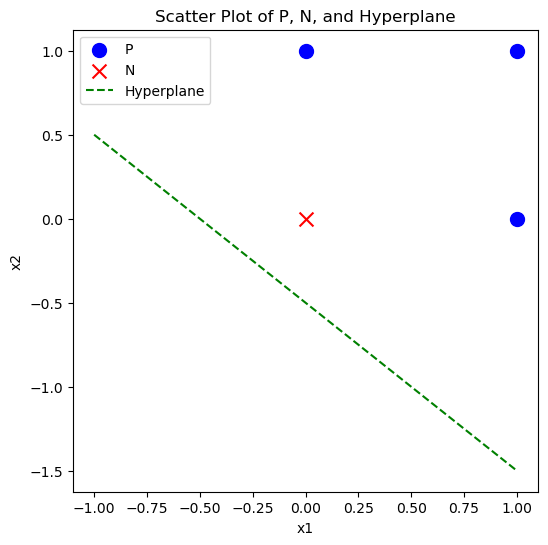

In [17]:
import numpy as np
import matplotlib.pyplot as plt


P = np.array(P)  
N = np.array(N)  

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(P[:, 0], P[:, 1], color='blue', label='P', marker='o', s=100) 
ax.scatter(N[:, 0], N[:, 1], color='red', label='N', marker='x', s=100)  

x1_vals = np.linspace(-1, 1, 100)
x2_vals = - (w_values[0] / w_values[1]) * x1_vals - c_value / w_values[1]

ax.plot(x1_vals, x2_vals, color='green', label='Hyperplane', linestyle='--')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Scatter Plot of P, N, and Hyperplane')

ax.legend()

plt.show()
